# 1000 Most Popular Eurorack Modules in 2024 EDA

<br>

Experimental data analysis of the most popular eurorack modules in 2024, sourced form ModularGrid. A look at the manufacturers in the industry, the size, price, functions, and popularity of modules and companies. 

### Attributes
- <code>Name</code> The name of the module. <br>
- <code>Manufacturer</code> Name of the Company that designed the module. <br>
- <code>Functions</code> List of features that the module has been tagged with. <br>
- <code>HP</code> Size of the front panel in Horizontal Pitch, where one HP is 5.08mm. <br>
- <code>Depth</code> Distance from the font panel to the back of the module in mm. <br>
- <code>+12V (mA)</code> Current draw of the positive 12-volt rail. <br>
- <code>-12V (mA)</code> Current draw of the negative 12-volt rail. <br>
- <code>+5V (mA)</code> Current draw of the positive 5-volt rail. <br>
- <code>Price (€)</code> Set or estimated price of the module in Euros. <br>
- <code>Racks</code> Number of virtual user racks the module features in. <br>
- <code>Rating</code> A mean average of user ratings from 0-5. <br>
- <code>Votes</code> Number of users who left a rating. <br>
- <code>Available</code> Information regarding whether the module is currently being produced. <br>
- <code>Approved</code> Has the module’s specifications been approved by the manufacturer. 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl #colour maps

import seaborn as sns

In [2]:
#import data set
df = pd.read_csv('1000_most_popular_eurorack_modules_2024.csv', index_col=0)

#clean functions, dont want double square bracets
df.Functions = df.Functions.str.replace("'", "")
df.Functions = df.Functions.str.replace("[", "")
df.Functions = df.Functions.str.replace("]", "")
df.Functions = df.Functions.str.replace(" ", "") #spaces causing issues

#convert functions form string format to a list, for when dummies are created
df['Functions'] = df['Functions'].str.split(",")

df.head()

,Name,Manufacturer,Functions,HP,Depth,+12V (mA),-12V (mA),+5V (mA),Price (€),Racks,Rating,Votes,Available,Approved
0,Maths,Make Noise,"[Attenuator, CVModulation, EnvelopeFollower, E...",20,24.0,60.0,50.0,0.0,268.0,122221,4.60,961.0,No Info,1
1,Plaits,Mutable instruments,"[Noise, Oscillator, SynthVoice, Drum, Digital]",12,25.0,50.0,5.0,0.0,250.0,62584,4.57,352.0,Discontinued,0
2,Pamela's NEW Workout,ALM Busy Circuits,"[ClockGenerator, Digital, LFO, ClockModulator,...",8,22.0,50.0,1.0,0.0,279.0,55808,4.75,382.0,Discontinued,0
3,Disting mk4,Expert Sleepers,"[Effect, Quantizer, Utility, LFO, Oscillator, ...",4,42.0,51.0,19.0,0.0,189.0,50056,4.42,276.0,Available,0
4,Morphagene,Make Noise,"[Sampling, Delay, Digital, Dual/Stereo, Envelo...",20,30.0,165.0,20.0,0.0,569.0,49149,4.63,217.0,Available,1


In [3]:
df.describe()

,HP,Depth,+12V (mA),-12V (mA),+5V (mA),Price (€),Racks,Rating,Votes,Approved
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,11.884000,33.702100,78.11010,35.591400,2.028000,232.774919,5631.573000,4.323690,40.155000,0.459000
std,9.895882,9.857758,77.28533,39.762074,28.612338,161.181599,7124.583517,0.542534,51.906891,0.498566
min,2.000000,10.000000,0.00000,0.000000,0.000000,1.119000,1631.000000,1.000000,0.000000,0.000000
25%,6.000000,25.000000,30.00000,10.000000,0.000000,103.000000,2319.500000,4.180000,15.000000,0.000000
50%,8.000000,33.700000,60.00000,25.000000,0.000000,199.000000,3445.500000,4.440000,25.000000,0.000000
75%,16.000000,40.000000,98.00000,46.000000,0.000000,310.000000,6056.750000,4.670000,45.000000,1.000000
max,84.000000,75.000000,750.00000,430.000000,850.000000,960.000000,122221.000000,5.000000,961.000000,1.000000


In [4]:
df.describe(include = "O")

,Name,Manufacturer,Functions,Available
count,1000,1000,1000,1000
unique,979,135,720,3
top,Mult,Doepfer,[Filter],Available
freq,4,117,26,761


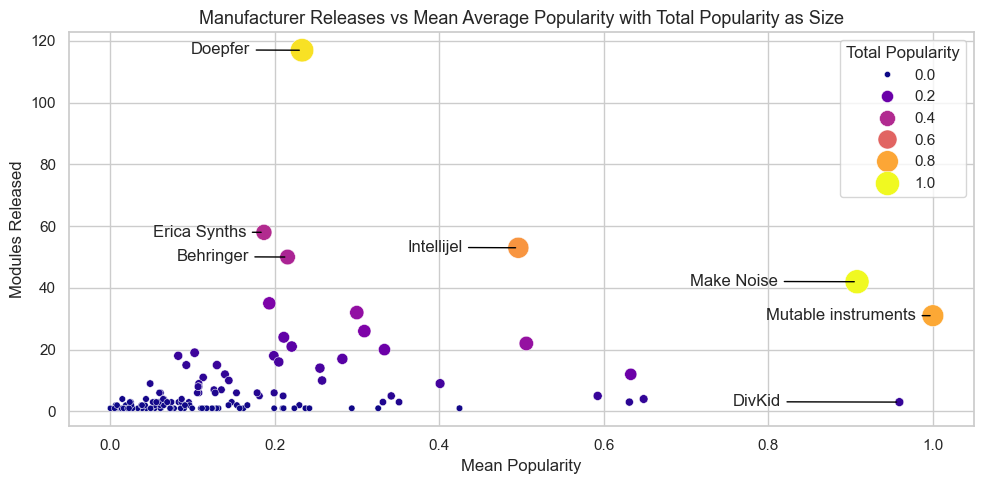

In [5]:
#finding manufactures with most releases and popularity
manufacturer = df.groupby('Manufacturer').agg(
    Modules = ('Name', 'count'), #count modules by manufacturer 
    Racks = ('Racks', 'sum'),
    Mean_Racks = ('Racks', 'mean'),
    Mean_Rating = ('Rating', 'mean'),
    Mean_Price = ('Price (€)', 'mean'))  #mean racks (racks/module count)

#put index back
manufacturer = manufacturer.reset_index()

#Normailize (min-max) both racks and mean rack
manufacturer.Racks = (manufacturer.Racks-manufacturer.Racks.min())/(manufacturer.Racks.max()-manufacturer.Racks.min())
manufacturer.Mean_Racks = (manufacturer.Mean_Racks-manufacturer.Mean_Racks.min())/(manufacturer.Mean_Racks.max()-manufacturer.Mean_Racks.min())

sns.set_theme(style="whitegrid") #add a seaborn grid style

plt.figure(figsize=(10, 5))
sns.scatterplot(
    data = manufacturer,
    x = 'Mean_Racks', 
    y = 'Modules',
    hue = 'Racks',
    size = 'Racks',
    sizes = (20, 300),
    palette = 'plasma',
    legend = True
    )

#get manufactures to annotate
highest_modules = manufacturer.Modules.nlargest(4).index #get index at this point
highest_mean_racks = manufacturer.Mean_Racks.nlargest(3).index
annotated_manufactures = highest_modules.union(highest_mean_racks)

#addind labels and lines
for i in annotated_manufactures:
    if i in highest_modules:
        offset = (-80, -3)
    else:
        offset = (-120, -3)
    plt.annotate(
        manufacturer.Manufacturer.loc[i],
        xy = (manufacturer.Mean_Racks.loc[i], manufacturer.Modules.loc[i]),
        xytext=offset,
        textcoords='offset points',
        arrowprops=dict(arrowstyle="-", lw=1, color='black')
    )

plt.xlabel('Mean Popularity', fontsize=12)
plt.ylabel('Modules Released', fontsize=12)
plt.legend(title='Total Popularity')
plt.title('Manufacturer Releases vs Mean Average Popularity with Total Popularity as Size', fontsize=13)

plt.tight_layout()
plt.show()

#plt.savefig("Plot_1.png")

In [6]:
#mean rating of all modules
df.Rating.mean()

4.323690000000001

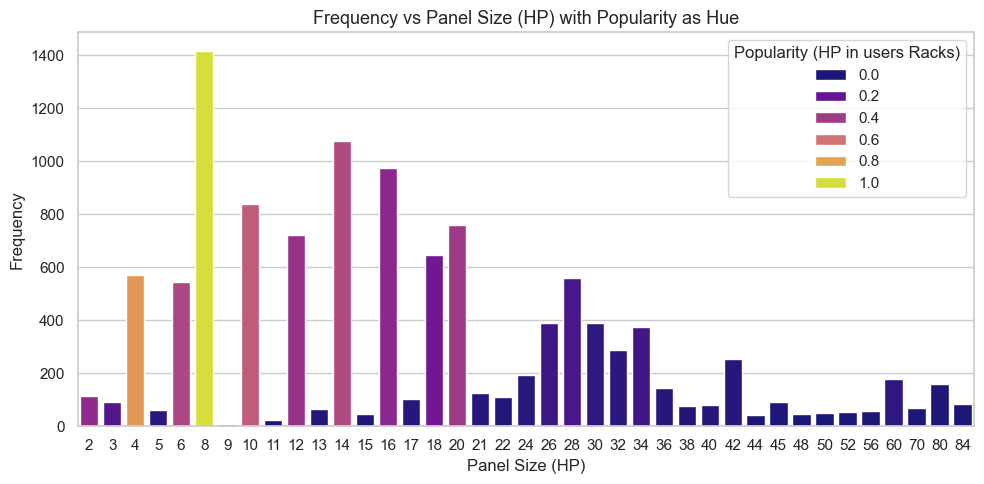

In [8]:
#plot HP and see which HP is the most popular

#group by HP
HP = df.groupby('HP').agg(
    Count = ('HP', 'sum'),
    Racks = ('Racks', 'sum'),
    Mean_Racks = ('Racks', 'mean'))  #mean racks (racks/module count)

#normailize (min-max) the popularity
HP.Racks = (HP.Racks-HP.Racks.min())/(HP.Racks.max()-HP.Racks.min())

plt.figure(figsize=(10, 5))

sns.set_theme(style="whitegrid") #add a seaborn grid style

sns.barplot(HP,
            x = HP.index, 
            y = HP.Count,
            hue = HP['Racks'],
            #hue = HP['Mean_Racks'],
            errorbar=None,
            #facecolor='teal,
            palette = 'plasma'
           )



plt.xlabel('Panel Size (HP)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Popularity (HP in users Racks)')
plt.title('Frequency vs Panel Size (HP) with Popularity as Hue', fontsize=13)

plt.tight_layout()
plt.show()

#plt.savefig("Plot_3.png")

#even number HP is far more popular

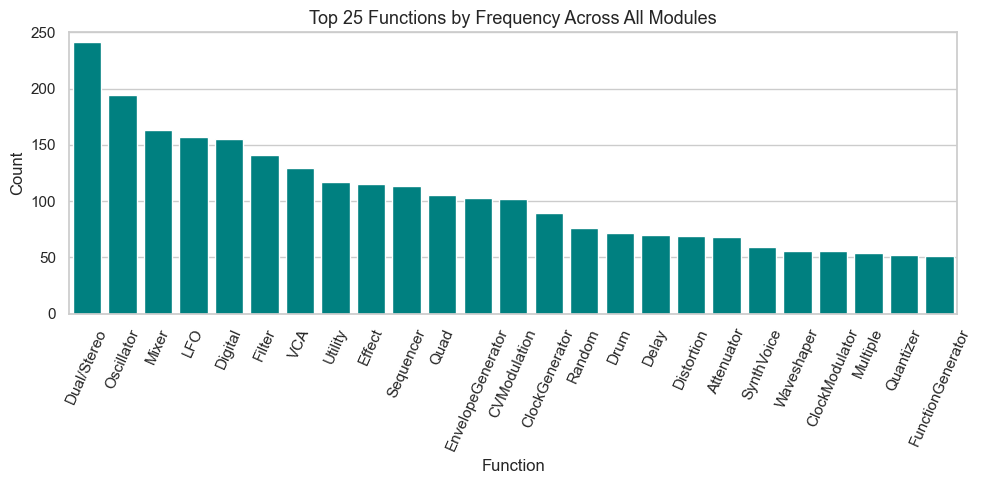

In [15]:
#sum all function columns and sort from largest
function_count = df.iloc[:, 14:].sum().sort_values(ascending=False)
function_count = function_count.nlargest(25)


plt.figure(figsize=(10, 5))

sns.barplot(function_count,
           facecolor='teal')

#set y axis range
plt.ylim(0, 250)

plt.ylabel('Count', fontsize=12)
plt.xlabel('Function', fontsize=12)
plt.title('Top 25 Functions by Frequency Across All Modules',  fontsize=13)
plt.xticks(rotation=66)  #rotate functions names

plt.tight_layout()
plt.show()

In [10]:
#get dummies function was not working well...

#get all unique function names
function_names = set(function for functions in df['Functions'] for function in functions)

#create column for each function
for f_name in function_names:
    #add 1 if the function name appears in the orginal Functions list
    df[f_name] = df['Functions'].apply(lambda x: 1 if f_name in x else 0)

#drop truegrid and some other unwanted attributes
df = df.drop(columns=['TrueGrid', 'Votes', 'Approved'])

#remove all strings
df_without_str = df.select_dtypes(include='number')
correlation_matrix = df_without_str.corr()

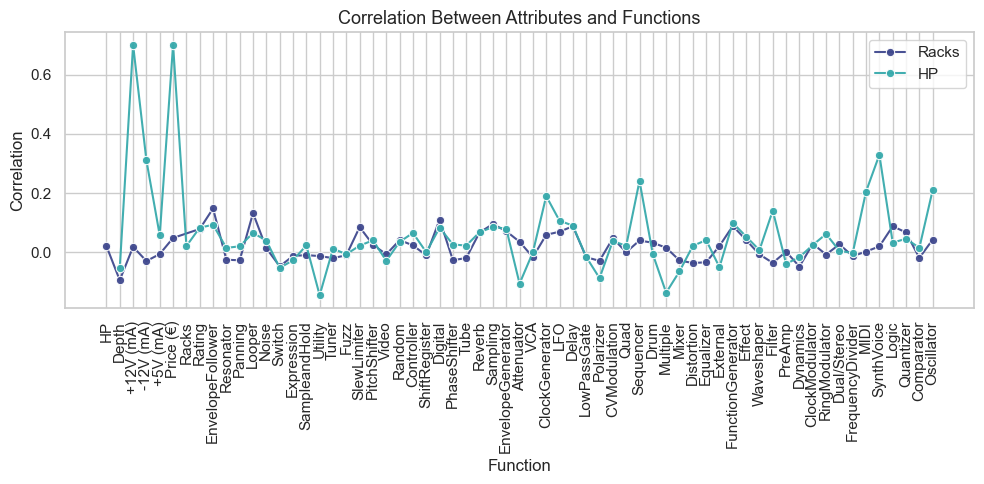

In [11]:
#figure visulizing corrilation between attributes and functions
plt.figure(figsize=(10, 5))

#choose which attributes to display
display_functions = ['HP', 'Racks']
#HP and price are strongly corrilated

#only get corrilation of selected functions
display_correlation_matrix = correlation_matrix.loc[display_functions, :]
display_correlation_matrix = display_correlation_matrix.reset_index().melt(id_vars='index', var_name='Functions', value_name='Correlation')
#remove functions that are being displayed in hue, so there is no self corrilation
display_correlation_matrix = display_correlation_matrix[display_correlation_matrix['index'] != display_correlation_matrix['Functions']] 

sns.set_theme(style="whitegrid")

sns.lineplot(display_correlation_matrix,
             x = 'Functions',
             y = 'Correlation',
             hue = 'index',
             marker = 'o',
             palette = 'mako',
             alpha = 0.95
            )

plt.xlabel('Function', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.legend()
plt.title('Correlation Between Attributes and Functions', fontsize=13)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#plt.savefig("Plot_4.png")

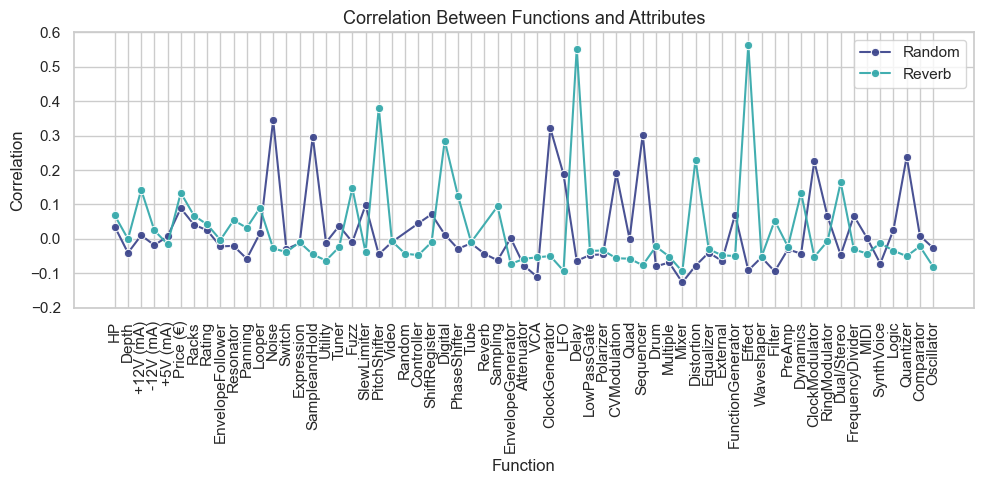

In [12]:
plt.figure(figsize=(10, 5))

#choose which functions to display
display_functions = ['Random', 'Reverb']

display_correlation_matrix = correlation_matrix.loc[display_functions, :]
display_correlation_matrix = display_correlation_matrix.reset_index().melt(id_vars='index', var_name='Functions', value_name='Correlation')
display_correlation_matrix = display_correlation_matrix[display_correlation_matrix['index'] != display_correlation_matrix['Functions']] 

sns.set_theme(style="whitegrid")

sns.lineplot(display_correlation_matrix,
             x = 'Functions',
             y = 'Correlation',
             hue = 'index',
             marker = 'o',
             palette = 'mako',
             alpha = 0.95
            )


#set y axis range
plt.ylim(-0.2, 0.6)


plt.xlabel('Function', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.legend()
plt.title('Correlation Between Functions and Attributes', fontsize=13)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#plt.savefig("Plot_5.png")

In [13]:
#drop unwanted columns, Votes, Approved and TrueGrid removed before
df_manufacturer	 = df.drop(['Name', 'Functions', 'HP', 'Depth', '+12V (mA)', '-12V (mA)',
                            '+5V (mA)', 'Price (€)', 'Racks', 'Rating', 'Available'], axis=1)
df_manufacturer	= df_manufacturer.groupby('Manufacturer').sum() #.reset_index()

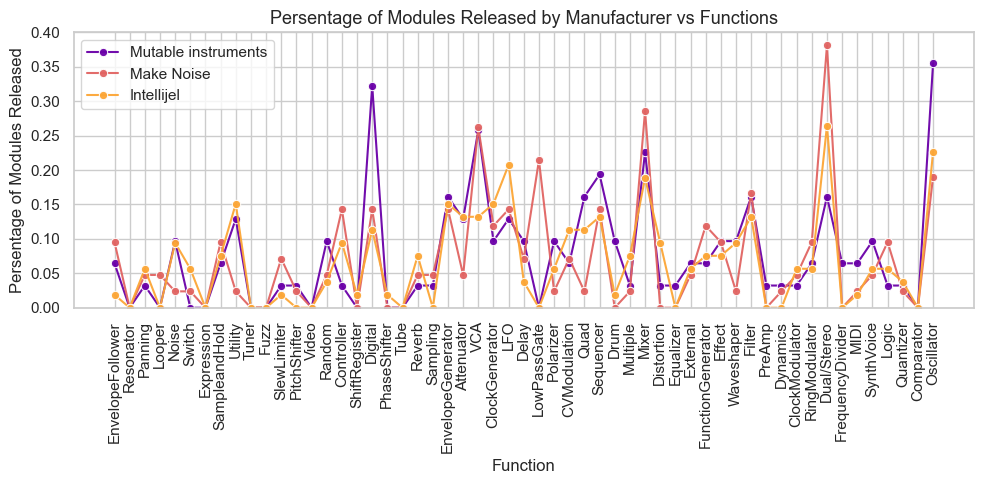

In [14]:
#figure visualizing what functions maufacturers have in their modules
plt.figure(figsize=(10, 5))

sns.set_theme(style="whitegrid")

# Generate a colormap - CHATGPT, cool stuff
palette = mpl.colormaps['plasma']  #get map
colours = [palette(i / 5) for i in range(5)] #get 5 values

#divide function count by manufacture releases (normalize)
sns.lineplot(df_manufacturer.loc['Mutable instruments']/manufacturer.iloc[2, 1], alpha = 0.95, color=colours[1], label='Mutable instruments', marker='o')
sns.lineplot(df_manufacturer.loc['Make Noise']/manufacturer.iloc[0, 1], alpha = 0.95, color=colours[3], label='Make Noise', marker='o')
sns.lineplot(df_manufacturer.loc['Intellijel']/manufacturer.iloc[3, 1], alpha = 0.95, color=colours[4], label='Intellijel', marker='o')

plt.xlabel('Function', fontsize=12)
plt.ylabel('Persentage of Modules Released', fontsize=12)
plt.legend()
plt.title('Persentage of Modules Released by Manufacturer vs Functions', fontsize=13)

#set y axis range
plt.ylim(0, 0.4)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#plt.savefig("Plot_6.png")

## Wes Leggo-Morrell 2024

#### **[Instagram](https://www.instagram.com/modular.mooch)**

#### **[GitHub](https://github.com/WesDaMooch)**